<p style="align: center;"><img align=center src="https://drive.google.com/uc?export=view&id=1I8kDikouqpH4hf7JBiSYAeNT2IO52T-T" width=600 height=480/></p>
<h3 style="text-align: center;"><b>–®–∫–æ–ª–∞ –≥–ª—É–±–æ–∫–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –§–ü–ú–ò –ú–§–¢–ò</b></h3>

<h3 style="text-align: center;"><b>–î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. –í–µ—Å–Ω–∞ 2021</b></h3>

# Generative adversarial networks


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


–í —ç—Ç–æ–º –¥–æ–º–∞—à–Ω–µ–º –∑–∞–¥–∞–Ω–∏–∏ –≤—ã –æ–±—É—á–∏—Ç–µ GAN –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –ª–∏—Ü–∞ –ª—é–¥–µ–π –∏ –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ —Ç–æ, –∫–∞–∫ –º–æ–∂–Ω–æ –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏

In [2]:
import os
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
import torch
import torch.nn as nn
import cv2
from tqdm.notebook import tqdm
from torchvision.utils import save_image
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import clear_output

sns.set(style='darkgrid', font_scale=1.2)

## –ß–∞—Å—Ç—å 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö (1 –±–∞–ª–ª)

–í –∫–∞—á–µ—Å—Ç–≤–µ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –≤–æ–∑—å–º–µ–º —á–∞—Å—Ç—å –¥–∞—Ç–∞—Å–µ—Ç–∞ [Flickr Faces](https://github.com/NVlabs/ffhq-dataset), –∫–æ—Ç–æ—Ä—ã–π —Å–æ–¥–µ—Ä–∂–∏—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ª–∏—Ü –ª—é–¥–µ–π –≤ –≤—ã—Å–æ–∫–æ–º —Ä–∞–∑—Ä–µ—à–µ–Ω–∏–∏ (1024—Ö1024). –û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –æ—á–µ–Ω—å –±–æ–ª—å—à–æ–π, –ø–æ—ç—Ç–æ–º—É –º—ã –≤–æ–∑—å–º–µ–º –µ–≥–æ —á–∞—Å—Ç—å. –°–∫–∞—á–∞—Ç—å –¥–∞—Ç–∞—Å–µ—Ç –º–æ–∂–Ω–æ [–∑–¥–µ—Å—å](https://drive.google.com/file/d/1KWPc4Pa7u2TWekUvNu9rTSO0U2eOlZA9/view?usp=sharing)

–î–∞–≤–∞–π—Ç–µ –∑–∞–≥—Ä—É–∑–∏–º –Ω–∞—à–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è. –ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è —Å—Ç—Ä–æ–∏—Ç DataLoader –¥–ª—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, –ø—Ä–∏ —ç—Ç–æ–º –º–µ–Ω—è—è –∏—Ö —Ä–∞–∑–º–µ—Ä –¥–æ –Ω—É–∂–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è

In [3]:
!unzip /content/drive/MyDrive/ColabNotebooks/faces_dataset_small.zip

Archive:  /content/drive/MyDrive/ColabNotebooks/faces_dataset_small.zip
   creating: faces_dataset_small/
  inflating: faces_dataset_small/00055.png  
  inflating: faces_dataset_small/00237.png  
  inflating: faces_dataset_small/00240.png  
  inflating: faces_dataset_small/00241.png  
  inflating: faces_dataset_small/00242.png  
  inflating: faces_dataset_small/00243.png  
  inflating: faces_dataset_small/00244.png  
  inflating: faces_dataset_small/00245.png  
  inflating: faces_dataset_small/00246.png  
  inflating: faces_dataset_small/00247.png  
  inflating: faces_dataset_small/00248.png  
  inflating: faces_dataset_small/00249.png  
  inflating: faces_dataset_small/00253.png  
  inflating: faces_dataset_small/00255.png  
  inflating: faces_dataset_small/00257.png  
  inflating: faces_dataset_small/00258.png  
  inflating: faces_dataset_small/00259.png  
  inflating: faces_dataset_small/00260.png  
  inflating: faces_dataset_small/00261.png  
  inflating: faces_dataset_small/00262.

In [4]:
DATA_DIR = '/content/faces_dataset'
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [5]:
def get_dataloader(data_dir, image_size, batch_size, stats):
  """
  Builds dataloader for training data.
  Use tt.Compose and tt.Resize for transformations
  :param image_size: height and wdith of the image
  :param batch_size: batch_size of the dataloader
  :returns: DataLoader object 
  """
  # TODO: resize images, convert them to tensors and build dataloader
  
  train_ds = ImageFolder(DATA_DIR, transform=tt.Compose([
    tt.Resize(image_size),
    tt.CenterCrop(image_size),
    tt.ToTensor(),
    tt.Normalize(*stats)]))
  
  train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)

  return train_dl

In [6]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

In [7]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [8]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

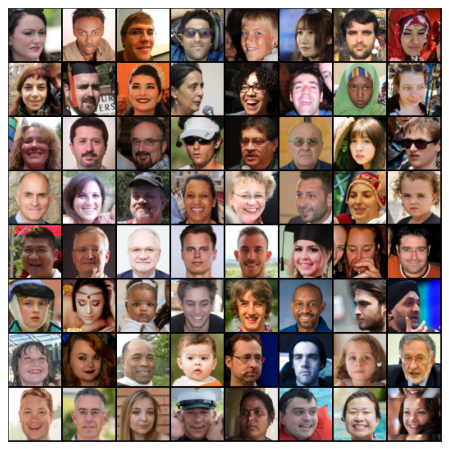

In [10]:
image_size = 64
batch_size = 128

train_dl = get_dataloader(DATA_DIR, image_size, batch_size, stats)
show_batch(train_dl)

In [11]:
#TODO: build dataloader and transfer it to device
train_dl = DeviceDataLoader(train_dl, device)

## –ß–∞—Å—Ç—å 2. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ (2 –±–∞–ª–ª–∞)

–°–∫–æ–Ω—Å—Ç—Ä—É–∏—Ä—É–π—Ç–µ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –∏ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä. –ü–æ–º–Ω–∏—Ç–µ, —á—Ç–æ:
* –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ (—Ç–µ–Ω–∑–æ—Ä —Ä–∞–∑–º–µ—Ä–∞ `3 x image_size x image_size`) –∏ –≤—ã–¥–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –Ω–∞—Å—Ç–æ—è—â–µ–µ (—Ç–µ–Ω–∑–æ—Ä —Ä–∞–∑–º–µ—Ä–∞ 1)

* –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ —Ç–µ–Ω–∑–æ—Ä —à—É–º–æ–≤ —Ä–∞–∑–º–µ—Ä–∞ `latent_size x 1 x 1` –∏ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–∞ `3 x image_size x image_size`

 Stride is the number of pixels shifts over the input matrix. 
 For padding p, filter size ùëì‚àóùëì and input image size ùëõ ‚àó ùëõ 
 and stride ‚Äòùë†‚Äô our output image dimension will be 
 [ {(ùëõ + 2ùëù ‚àí ùëì) / ùë†} + 1] ‚àó [ {(ùëõ + 2ùëù ‚àí ùëì) / ùë†} + 1]

In [12]:
discriminator = nn.Sequential(
    # in: 3 x 512 x 512

    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 64 x 32 x 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 128 x 16 x 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 4 x 4
    
#     nn.Conv2d(512, 512, kernel_size=4, stride=2, padding=1, bias=False),
#     nn.BatchNorm2d(512),
#     nn.LeakyReLU(0.2, inplace=True),
    # out: 1024 x 16 x 16
    
#     nn.Conv2d(512, 512, kernel_size=4, stride=2, padding=1, bias=False),
#     nn.BatchNorm2d(512),
#     nn.LeakyReLU(0.2, inplace=True),
    # out: 2048 x 8 x 8
    
#     nn.Conv2d(512, 512, kernel_size=4, stride=2, padding=1, bias=False),
#     nn.BatchNorm2d(512),
#     nn.LeakyReLU(0.2, inplace=True),
    # out: 4096 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # out: 1 x 1 x 1

    nn.Flatten(),
    nn.Sigmoid()
)

In [13]:
discriminator = to_device(discriminator, device)

In [14]:
latent_size = 512 # choose latent size

generator = nn.Sequential(
    # in: latent_size x 1 x 1

#     nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
#     nn.BatchNorm2d(512),
#     nn.ReLU(True),
    # out: 4096 x 4 x 4

#     nn.ConvTranspose2d(512, 512, kernel_size=4, stride=2, padding=1, bias=False),
#     nn.BatchNorm2d(512),
#     nn.ReLU(True),
    # out: 2048 x 8 x 8

#     nn.ConvTranspose2d(512, 512, kernel_size=4, stride=2, padding=1, bias=False),
#     nn.BatchNorm2d(512),
#     nn.ReLU(True),
    # out: 1024 x 16 x 16

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 4 x 4
    
    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 8 x 8
    
    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16
    
    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 3 x 64 x 64
)

In [15]:
generator = to_device(generator, device)

torch.Size([128, 3, 64, 64])


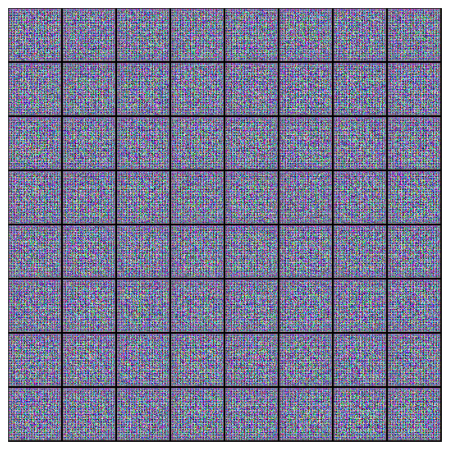

In [ ]:
xb = torch.randn(batch_size, latent_size, 1, 1) 
fake_images = generator(xb.cuda())
print(fake_images.shape)
show_images(fake_images.cpu())

In [16]:
sample_dir = 'generated'
os.makedirs(sample_dir, exist_ok=True)

In [17]:
fixed_latent = torch.randn(batch_size, latent_size, 1, 1, device=device)

–ü–µ—Ä–µ–π–¥–µ–º —Ç–µ–ø–µ—Ä—å –∫ –æ–±—É—á–µ–Ω–∏—é –Ω–∞—à–µ–≥–æ GAN–∞. –ê–ª–≥–æ—Ä–∏—Ç–º –æ–±—É—á–µ–Ω–∏—è —Å–ª–µ–¥—É—é—â–∏–π:
1. –£—á–∏–º –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä:
  * –±–µ—Ä–µ–º —Ä–µ–∞–ª—å–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏ –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –∏–º –º–µ—Ç–∫—É 1
  * –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–æ–º –∏ –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –∏–º –º–µ—Ç–∫—É 0
  * –æ–±—É—á–∞–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –Ω–∞ –¥–≤–∞ –∫–ª–∞—Å—Å–∞

2. –£—á–∏–º –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä:
  * –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–æ–º –∏ –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º –∏–º –º–µ—Ç–∫—É 0
  * –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–æ—Ä–æ–º, —Ä–µ–∞–ª—å–Ω–æ–µ —ç—Ç–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏–ª–∏ –Ω–µ—Ç


–í –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –±–µ—Ä–µ–º –±–∏–Ω–∞—Ä–Ω—É—é –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—é

In [18]:
def save_samples(model, index, latent_tensors, show=True):
    fake_images = model["generator"](latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))

In [19]:
def fit(model, criterion, epochs, lr):
    model["discriminator"].train()
    model["generator"].train()
    torch.cuda.empty_cache()
    
    # Losses & scores
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []
    
    # Create optimizers
    optimizer = {
        "discriminator": torch.optim.Adam(model["discriminator"].parameters(), #AdamW
                                          lr=lr, betas=(0.5, 0.999)),
        "generator": torch.optim.Adam(model["generator"].parameters(),
                                      lr=lr, betas=(0.5, 0.999))
    }

    # Create sheduler
    scheduler = {
        "discriminator": torch.optim.lr_scheduler.MultiStepLR(optimizer["discriminator"], 
                                                              milestones=[50, 150, 280], gamma=0.5), #  milestones=[50, 100, 150, 280], gamma=0.5)
        "generator": torch.optim.lr_scheduler.MultiStepLR(optimizer["generator"], 
                                                          milestones=[50, 150, 280], gamma=0.5)
    }
    
    for epoch in range(epochs):
        loss_d_per_epoch = []
        loss_g_per_epoch = []
        real_score_per_epoch = []
        fake_score_per_epoch = []
        for real_images, _ in tqdm(train_dl):
            real_images = real_images.cuda()
            # Train discriminator
            # Clear discriminator gradients
            optimizer["discriminator"].zero_grad()

            # Pass real images through discriminator
            real_preds = model["discriminator"](real_images)
            real_targets = torch.ones(real_images.size(0), 1, device=torch.device('cuda'))
            real_loss = criterion["discriminator"](real_preds, real_targets)
            cur_real_score = torch.mean(real_preds).item()
            
            # Generate fake images
            latent = torch.randn(batch_size, latent_size, 1, 1, device=torch.device('cuda'))
            fake_images = model["generator"](latent)

            # Pass fake images through discriminator
            fake_targets = torch.zeros(fake_images.size(0), 1, device=torch.device('cuda'))
            fake_preds = model["discriminator"](fake_images)
            fake_loss = criterion["discriminator"](fake_preds, fake_targets)
            cur_fake_score = torch.mean(fake_preds).item()

            real_score_per_epoch.append(cur_real_score)
            fake_score_per_epoch.append(cur_fake_score)

            # Update discriminator weights
            loss_d = real_loss + fake_loss
            loss_d.backward()
            optimizer["discriminator"].step()
            loss_d_per_epoch.append(loss_d.item())


            # Train generator
            # Clear generator gradients
            optimizer["generator"].zero_grad()
            
            # Generate fake images
            latent = torch.randn(batch_size, latent_size, 1, 1, device=torch.device('cuda'))
            fake_images = model["generator"](latent)
            
            # Try to fool the discriminator
            preds = model["discriminator"](fake_images)
            targets = torch.ones(batch_size, 1, device=torch.device('cuda'))
            loss_g = criterion["generator"](preds, targets)
            
            # Update generator weights
            loss_g.backward()
            optimizer["generator"].step()
            loss_g_per_epoch.append(loss_g.item())
            
        # Record losses & scores
        losses_g.append(np.mean(loss_g_per_epoch))
        losses_d.append(np.mean(loss_d_per_epoch))
        real_scores.append(np.mean(real_score_per_epoch))
        fake_scores.append(np.mean(fake_score_per_epoch))
        
        if scheduler:
            scheduler["discriminator"].step()
            scheduler["generator"].step()

        # visualize        
        clear_output(wait=True)
        # Log losses & scores (last batch)
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, 
            losses_g[-1], losses_d[-1], real_scores[-1], fake_scores[-1]))
        
        xb = torch.randn(batch_size, latent_size, 1, 1) 
        fake_images = model['generator'](xb.cuda())
        show_images(fake_images.cpu())
        
        plt.figure(figsize=(15, 6))
        plt.plot(losses_d, '-')
        plt.plot(losses_g, '-')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.legend(['Discriminator', 'Generator'])
        plt.title('Losses')
        
        plt.figure(figsize=(15, 6))
        plt.plot(real_scores, '-')
        plt.plot(fake_scores, '-')
        plt.xlabel('epoch')
        plt.ylabel('score')
        plt.legend(['Real', 'Fake'])
        plt.title('Scores');
        plt.show()
        
        # Save generated images
#         if epoch == epochs - 1:
#             save_samples(epoch+start_idx, fixed_latent, show=False)
    
    return losses_g, losses_d, real_scores, fake_scores

In [20]:
lr = 1e-3
epochs = 140 #300 —ç–ø–æ—Ö –¥–∞—é—Ç –±–æ–ª–µ–µ –∫—Ä–∞—Å–∏–≤—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç

model = {
    "discriminator": discriminator,
    "generator": generator
}

criterion = {
    "discriminator": nn.BCELoss(),
    "generator": nn.BCELoss()
}

Epoch [132/140], loss_g: 5.2815, loss_d: 0.1298, real_score: 0.9442, fake_score: 0.0535


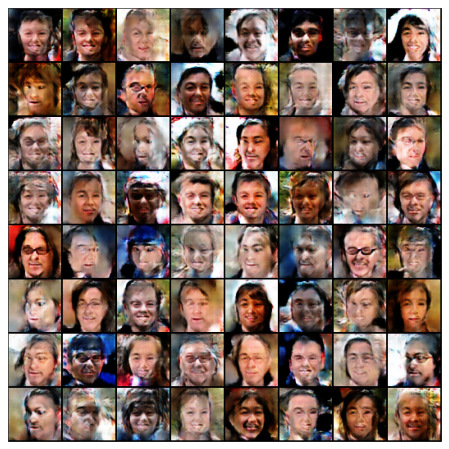

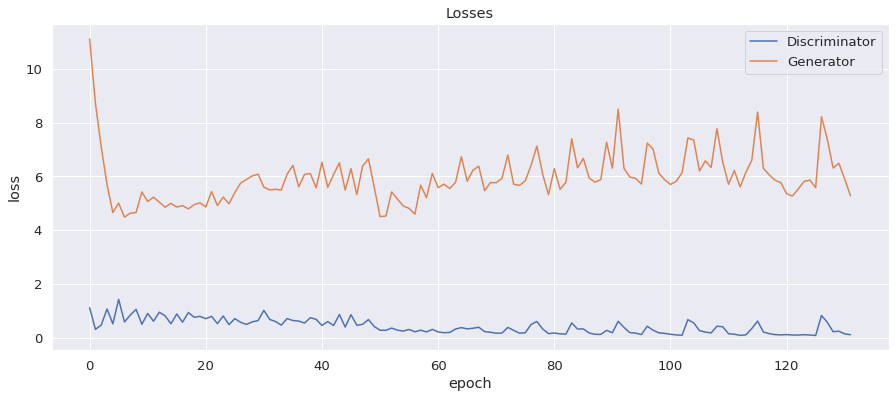

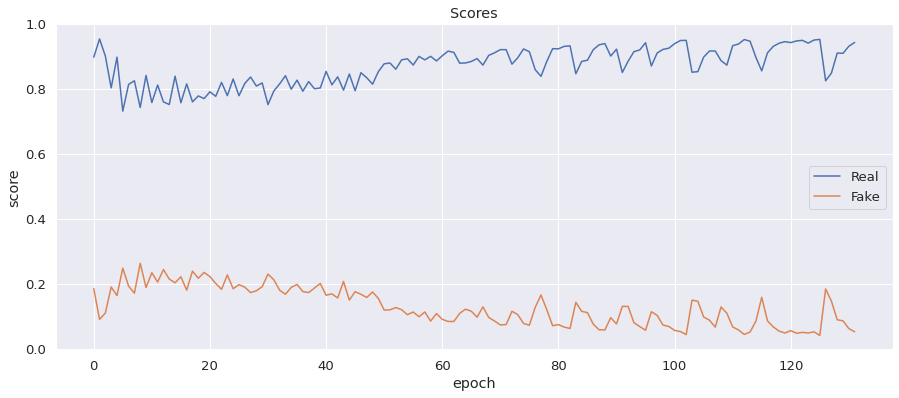

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
history = fit(model, criterion, epochs, lr)

In [ ]:
losses_g, losses_d, real_scores, fake_scores = history

torch.save(model['generator'].state_dict(), '/content/drive/MyDrive/ColabNotebooks/generator_e300_png64_l512.pth')
torch.save(model['discriminator'].state_dict(), '/content/drive/MyDrive/ColabNotebooks/discriminator_e300_png64_l512.pth')

–ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ –ª–æ—Å—Å–∞ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ –∏ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–∞. –ß—Ç–æ –≤—ã –º–æ–∂–µ—Ç–µ —Å–∫–∞–∑–∞—Ç—å –ø—Ä–æ —ç—Ç–∏ –≥—Ä–∞—Ñ–∏–∫–∏?

## –ß–∞—Å—Ç—å 3. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π (1 –±–∞–ª–ª)

–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –æ—Ü–µ–Ω–∏–º –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ–ª—É—á–∏–≤—à–∏—Ö—Å—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –≤—ã–≤–æ–¥–∏—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –Ω–∞—à–∏–º –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–æ–º

In [ ]:
fake_images = model["generator"](fixed_latent.cuda())
show_images(fake_images.cpu())

–ö–∞–∫ –≤–∞–º –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ–ª—É—á–∏–≤—à–∏—Ö—Å—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π?

–ö–ª–∞—Å—Å–Ω–æ!

## –ß–∞—Å—Ç—å 4. Leave-one-out-1-NN classifier accuracy (6 –±–∞–ª–ª–æ–≤)

### 4.1. –ü–æ–¥—Å—á–µ—Ç accuracy (4 –±–∞–ª–ª–∞)

–ù–µ –≤—Å–µ–≥–¥–∞ –±—ã–≤–∞–µ—Ç —É–¥–æ–±–Ω–æ –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∫–∞—Ä—Ç–∏–Ω–æ–∫ –≥–ª–∞–∑–∞–º–∏. –í –∫–∞—á–µ—Å—Ç–≤–µ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤—ã –≤–∞–º –ø—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–π –ø–æ–¥—Ö–æ–¥:
  * –°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å —Å—Ç–æ–ª—å–∫–æ –∂–µ —Ñ–µ–π–∫–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, —Å–∫–æ–ª—å–∫–æ –µ—Å—Ç—å –Ω–∞—Å—Ç–æ—è—â–∏—Ö –≤ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ. –ü—Ä–∏—Å–≤–æ–∏—Ç—å —Ñ–µ–π–∫–æ–≤—ã–º –º–µ—Ç–∫—É –∫–ª–∞—Å—Å–∞ 0, –Ω–∞—Å—Ç–æ—è—â–∏–º ‚Äì 1.
  * –ü–æ—Å—Ç—Ä–æ–∏—Ç—å leave-one-out –æ—Ü–µ–Ω–∫—É: –æ–±—É—á–∏—Ç—å 1NN Classifier (`sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)`) –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –∫–ª–∞—Å—Å –Ω–∞ –≤—Å–µ—Ö –æ–±—ä–µ–∫—Ç–∞—Ö, –∫—Ä–æ–º–µ –æ–¥–Ω–æ–≥–æ, –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ (accuracy) –Ω–∞ –æ—Å—Ç–∞–≤—à–µ–º—Å—è –æ–±—ä–µ–∫—Ç–µ. –í —ç—Ç–æ–º –≤–∞–º –ø–æ–º–æ–∂–µ—Ç `sklearn.model_selection.LeaveOneOut`

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut, cross_val_score

–°—á–∏—Ç–∞—Ç—å knn –Ω–∞ 16k –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö –Ω–µ –±—É–¥–µ–º, —Ç–∞–∫ –∫–∞–∫:

* —ç—Ç–æ –∑–∞–Ω–∏–º–∞–µ—Ç –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏
* –º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã –ø–æ–¥–≤–µ—Ä–∂–µ–Ω—ã –ø—Ä–æ–∫–ª—è—Ç—å—é —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏

–í—ã–¥–µ–ª–∏–º –≥–ª–∞–≤–Ω—ã–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã –º–µ—Ç–æ–¥–æ–º PCA. –û—Å—Ç–∞–≤–∏–º n –≥–ª–∞–≤–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç, –æ–±—ä—Å—è—é—â–∏—Ö 90% –¥–∏—Å–ø–µ—Ä—Å–∏–∏.

In [ ]:
fixed_latent = torch.randn(500, latent_size, 1, 1, device=torch.device('cuda'))
fake_images = model["generator"](fixed_latent)
fake_images = fake_images.detach().cpu().flatten(start_dim=1)

In [ ]:
# –∑–∞–≥—Ä—É–∑–∏–º —Ä–µ–∞–ª—å–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è 64—Ö64
dl = get_dataloader(DATA_DIR, image_size, 500, stats)

for batch, _ in dl:
    true_images = batch
    break

true_images = true_images.flatten(start_dim=1)

In [ ]:
true_images.shape

In [ ]:
fake_images.shape

In [ ]:
# –æ–±—É—á—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞
X = torch.cat((fake_images, true_images))

In [ ]:
# —Ç–∞—Ä–≥–µ—Ç—ã
y0 = torch.zeros(fake_images.shape[0])
y1 = torch.ones(true_images.shape[0])
y = torch.cat((y0, y1))

In [ ]:
pca = PCA(n_components=0.9)

X_transformed = pca.fit_transform(X)

In [ ]:
# —á–∏—Å–ª–æ –≥–ª–∞–≤–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç
len(pca.explained_variance_ratio_)

In [ ]:
def plot_variances(d_variances):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
plot_variances(pca.explained_variance_)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
loo = LeaveOneOut()

In [ ]:
scores = cross_val_score(knn, X_transformed, y, scoring='accuracy', cv=loo, n_jobs=-1)

In [ ]:
# accuracy
scores.mean()

–ß—Ç–æ –≤—ã –º–æ–∂–µ—Ç–µ —Å–∫–∞–∑–∞—Ç—å –æ –ø–æ–ª—É—á–∏–≤—à–µ–º—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ? –ö–∞–∫–æ–π accuracy –º—ã —Ö–æ—Ç–µ–ª–∏ –±—ã –ø–æ–ª—É—á–∏—Ç—å –∏ –ø–æ—á–µ–º—É?

–ñ–µ–ª–∞–µ–º—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç - 0.5. –ú—ã —Ö–æ—Ç–∏–º, —á—Ç–æ–±—ã —Ä–µ–∞–ª—å–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –±—ã–ª–∏ –Ω–µ–æ—Ç–ª–∏—á–∏–º—ã –æ—Ç —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö.

### 4.2. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π (2 –±–∞–ª–ª–∞)

–î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ç–æ, –Ω–∞—Å–∫–æ–ª—å–∫–æ –ø–æ—Ö–æ–∂–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞—Å—Ç–æ—è—â–∏—Ö –∏ —Ñ–µ–π–∫–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –î–ª—è —ç—Ç–æ–≥–æ –≤–æ—Å–ø–æ–ª—å–∑—É–π—Ç–µ—Å—å –º–µ—Ç–æ–¥–æ–º, —Å–Ω–∏–∂–∞—é—â–∏–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å (–∫ –ø—Ä–∏–º–µ—Ä—É, TSNE) –∏ –∏–∑–æ–±—Ä–∞–∑–∏—Ç–µ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ —Ä–∞–∑–Ω—ã–º —Ü–≤–µ—Ç–æ–º —Ç–æ—á–∫–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ —Ä–µ–∞–ª—å–Ω—ã–º –∏ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–∏

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

–ü—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ –ø–æ–ª—É—á–∏–≤—à–∏–π—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç:

In [ ]:
tsne = TSNE(n_jobs=-1)

In [ ]:
true_images_tsne = tsne.fit_transform(true_images)

In [ ]:
fake_images_tsne = tsne.fit_transform(fake_images)

In [ ]:
images_tsne = np.concatenate((fake_images_tsne, true_images_tsne))

In [ ]:
plt.figure(figsize=(18, 18))
sns.scatterplot(x=images_tsne[:, 0], y=images_tsne[:, 1], hue=y)
plt.show()

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –≤–∏–¥–Ω–æ, —á—Ç–æ —Ä–µ–∞–ª—å–Ω—ã–µ –∏ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø–µ—Ä–µ–º–µ—à–∞–Ω—ã –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ $R^2$; –æ–¥–Ω–∞–∫–æ, —Ñ–µ–π–∫–æ–≤—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏–º–µ—é—Ç –±–æ–ª—å—à—É—é –¥–∏—Å–ø–µ—Ä—Å–∏—é. –ü–æ –∫—Ä–∞—è–º –º–Ω–æ–≥–æ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—â–∏—Ö—Å—è –æ—Ç —Ä–µ–∞–ª—å–Ω—ã—Ö (–ø–ª–æ—Ö–æ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞). –•–æ—Ä–æ—à–æ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∫–∞—Ä—Ç–∏–Ω–∫–∏ - —Ç–µ, —á—Ç–æ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –æ–±–ª–∞—Å—Ç–∏ —Ä–µ–∞–ª—å–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –ù–æ –∏–∑-–∑–∞ –≤—ã—Å–æ–∫–æ–π —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω–æ—Å—Ç–∏ –∏—Ö –Ω–µ–º–Ω–æ–≥–æ.